<a href="https://colab.research.google.com/github/SHARON442/cybertix/blob/main/GeminiAi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!pip install -q -U google-generativeai

In [2]:
import pathlib
import textwrap

import google.generativeai as genai

# Used to securely store your API key
from google.colab import userdata

from IPython.display import display
from IPython.display import Markdown


def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [3]:

# Or use `os.getenv('GOOGLE_API_KEY')` to fetch an environment variable.
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')

genai.configure(api_key=GOOGLE_API_KEY)

In [4]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-pro
models/gemini-pro-vision


In [5]:
model = genai.GenerativeModel('gemini-pro')

In [6]:
%%time
response = model.generate_content("What is the meaning of life?")

CPU times: user 154 ms, sys: 13 ms, total: 167 ms
Wall time: 9.31 s


In [7]:
to_markdown(response.text)

> There is no definitive answer to this philosophical question, as the meaning of life is highly subjective and personal. Different individuals may have varying interpretations and perspectives on what constitutes the meaning of their own lives. However, here are some common themes and ideas that people often associate with the meaning of life:
> 
> 1. **Purpose and Fulfillment:**
>    - Many people find meaning and fulfillment in pursuing their passions, interests, and goals. This can include creative endeavors, professional achievements, personal growth, or making a positive impact on the world.
> 
> 2. **Relationships and Connections:**
>    - Strong and meaningful relationships with family, friends, and loved ones often contribute significantly to a sense of purpose and belonging.
> 
> 3. **Contribution and Impact:**
>    - Making a positive difference in the world, whether through volunteering, activism, or simply being kind to others, can bring a sense of purpose and meaning.
> 
> 4. **Self-Actualization and Personal Growth:**
>    - Striving to become the best version of oneself, both personally and professionally, can lead to a sense of accomplishment and fulfillment.
> 
> 5. **Experiences and Adventures:**
>    - Embracing new experiences, traveling, learning, and stepping outside of one's comfort zone can bring excitement, growth, and a sense of meaning.
> 
> 6. **Legacy and Impact:**
>    - Considering the legacy one leaves behind and the impact they have had on others can contribute to a sense of purpose and significance.
> 
> 7. **Connecting to Something Larger Than Oneself:**
>    - Some individuals find meaning through spiritual or religious practices, connecting with nature, or exploring philosophical or existential ideas.
> 
> It's important to note that the meaning of life is not static and can evolve over time. It can be influenced by personal experiences, cultural context, and changing values and priorities throughout one's life. Ultimately, it is up to each individual to find and define what gives their life meaning and purpose.

In [9]:
%%time
response = model.generate_content("who is batman", stream=True)

CPU times: user 174 ms, sys: 15.5 ms, total: 189 ms
Wall time: 10.9 s


In [18]:
!curl -o batman.jpg https://assets-prd.ignimgs.com/2023/01/31/batman-blogroll-1646355379001-1675144026976.jpeg?width=1280

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 96426  100 96426    0     0   411k      0 --:--:-- --:--:-- --:--:--  413k


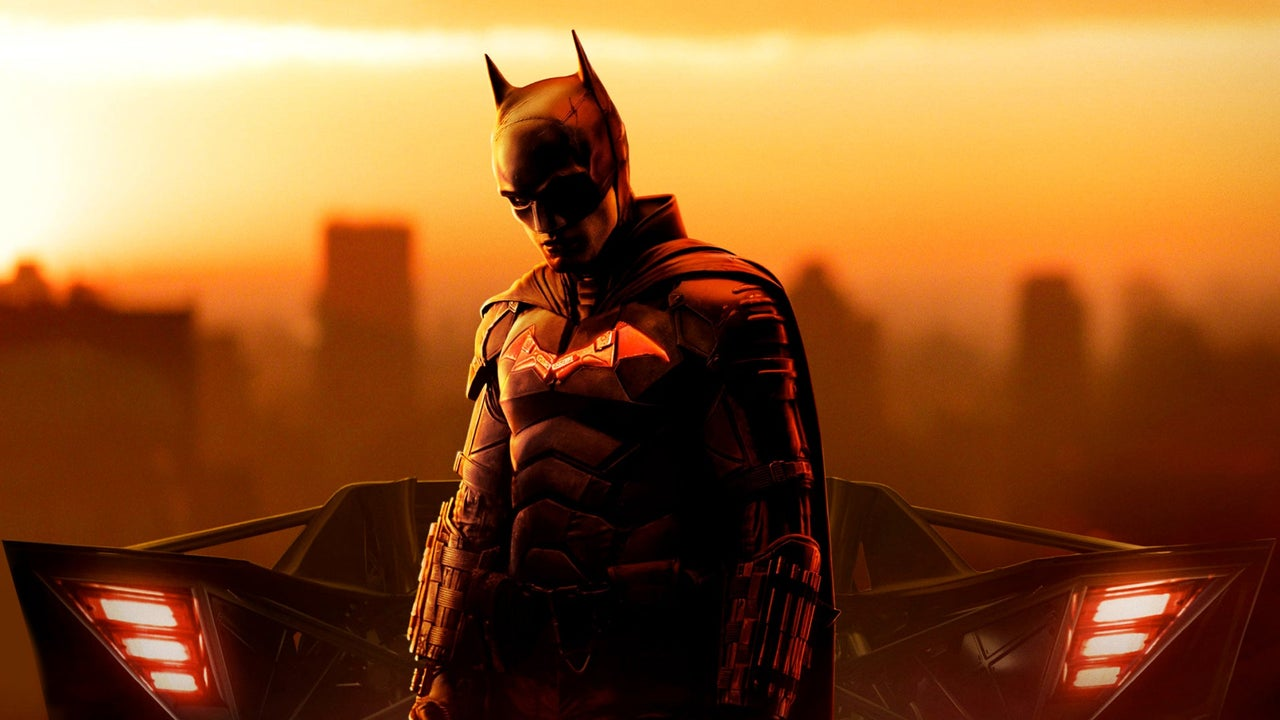

In [19]:
import PIL.Image

img = PIL.Image.open('batman.jpg')
img

In [20]:
model = genai.GenerativeModel('gemini-pro-vision')

In [21]:

response = model.generate_content(img)

to_markdown(response.text)

>  The Batman is a 2022 American superhero film based on the DC Comics character of the same name. Produced by DC Films, 6th & Idaho, and Dylan Clark Productions, and distributed by Warner Bros. Pictures, it is a reboot of the Batman film franchise. The film was directed by Matt Reeves, who wrote the screenplay with Peter Craig. It stars Robert Pattinson as Bruce Wayne / Batman, alongside Zoë Kravitz, Paul Dano, Jeffrey Wright, John Turturro, Peter Sarsgaard, Andy Serkis, and Colin Farrell. In the film, Batman investigates the corruption in Gotham City while pursuing the Riddler (Dano), a serial killer who targets Gotham's elite.
> 
> The Batman was announced in 2014, with Ben Affleck set to direct, co-write, and star as Batman. After Affleck's departure in 2017, Reeves was hired to direct and co-write a new take on the character. Pattinson was cast in May 2019, and filming took place from January 2020 to March 2021 in London, Liverpool, Glasgow, and Chicago. The film's release date was delayed several times due to the COVID-19 pandemic.
> 
> The Batman premiered in New York City on March 1, 2022, and was theatrically released in the United States on March 4. The film received generally positive reviews from critics, with praise for Pattinson's performance, Reeves' direction, the screenplay, cinematography, action sequences, musical score, and production design. It grossed over $750 million worldwide, making it the highest-grossing film of 2022. A sequel, titled The Batman – Part II, is scheduled to be released in 2025.

In [22]:
response = model.generate_content(["Write a short, engaging blog post based on this picture.", img], stream=True)
response.resolve()

In [23]:
to_markdown(response.text)

>  The Batman is a 2022 American superhero film based on the DC Comics character of the same name. Produced by DC Films, 6th & Idaho, and Dylan Clark Productions, and distributed by Warner Bros. Pictures, it is a reboot of the Batman film franchise. The film was directed by Matt Reeves, who wrote the screenplay with Peter Craig. It stars Robert Pattinson as Bruce Wayne / Batman, alongside Zoë Kravitz, Paul Dano, Jeffrey Wright, John Turturro, Peter Sarsgaard, Andy Serkis, and Colin Farrell. In the film, Batman investigates the corruption in Gotham City while pursuing the Riddler (Dano), a serial killer who targets Gotham's elite.
> 
> The Batman received generally positive reviews from critics, with praise for Pattinson's performance, Reeves' direction, the screenplay, cinematography, action sequences, musical score, and production design. The film grossed over $750 million worldwide, making it the highest-grossing film of 2022. A sequel is in development.

In [24]:
model = genai.GenerativeModel('gemini-pro')
chat = model.start_chat(history=[])
chat

In [25]:
response = chat.send_message("Hi")
to_markdown(response.text)

> Hello! How can I assist you today?